In [1]:
!pip install tslearn==0.5.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tslearn
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
import scipy.cluster.hierarchy as sch
import numpy as np
from tslearn.utils import to_time_series_dataset

In [3]:
moon_dict = {11:'Ноябрь', 12:'Декабрь', 1:'Январь', 2:'Февраль', 3:'Март', 4:'Апрель', 5:'Май', 6:'Июнь', 7:'Июль', 8:'Август', 9:'Сентябрь', 10:'Октябрь'}
color = ['green','gray','red']   

# Функции

In [4]:
# функция построения графика
def graph(df, label_list,titl_list,n):    
     
    plt.subplot(7,2,n)

    for i in range(len(df)):
        label_rus = None
        line = ':'

        if i-1 == rus_index:
            label_rus = 'Russia' 
            line = '-'          
        plt.plot(df[i,:], line, color=color[label_list[i]], label=label_rus)

    plt.title(titl_list)
    plt.xlabel('Дни')
    plt.ylabel('Число заболевших')
    plt.legend()


# Функция разделения данных на месяца возвращает список датафреймов
def moon_data(df):
    moon_buf = 0
    df_local = pd.DataFrame()
    df_list = []
    j = 0    

    for i in date:    
        if moon_buf != 0:
            moon = i.split('/')[0]
            if moon == moon_buf:
                df_local[i] = df[i]
            else:            
                df_list.append(df_local)
                df_local = pd.DataFrame()
                j += 1

        moon_buf = i.split('/')[0]
        df_local[i] = df[i]

    return df_list

# строит дендограмму из списка датафреймов
def dendr_from_list(df):
    for i in df:
        Z = sch.linkage(i, 'ward')
        plt.figure()
        dn = sch.dendrogram(Z)


# функция стандартизирует данные из списка датафреймов, проводит кластеризацию
# возвращает список обученых KMean и список стандартизированных данных
def clastering_list(df, clast):
    lst_kmin = []
    lst_ttsd = []

    for i in range(len(df)):
            ttsd = to_time_series_dataset(df[i])        
            tsk = TimeSeriesKMeans(n_clusters=clast[i])
            tsk_f = tsk.fit(ttsd)
            lst_kmin.append(tsk_f)
            lst_ttsd.append(ttsd)
            
    return lst_kmin, lst_ttsd

# Функция строит графики из списка датафреймов
# принимает список станартизированных данных и список pd.датафреймов
def ploting_list(df,df_for_title):    
    plt.figure(figsize=[18,24])
    
    n = 0

    def moon_name(df_for_title):
        moon = df_for_title[n]
        moon = moon.columns[0]
        moon = moon.split('/')[0]
        moon = moon_dict[int(moon)]
        return moon

    for i in df:
        plt.subplot(len(df),2,n+1)
        plt.subplots_adjust(hspace=1)
        
        for j in range(len(i)):
            line = '--'
            label_rus = None            
            if j-1 == rus_index:
                label_rus = 'Russia' 
                line = '-'   

            plt.plot(i[j], line, color=color[con_kmin_list[n].labels_[j]], label=label_rus)
            
            
        plt.title(moon_name(df_for_title))
        plt.xlabel('Дни')
        plt.legend()        
        n += 1

# Подготовка данных

In [5]:
df_confirmed = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Промежуточная атестация 1/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Промежуточная атестация 1/time_series_covid19_deaths_global.csv')

In [6]:
# Удаляем не нужные столбцы
df_confirmed_s = df_confirmed.drop(['Province/State', 'Lat', 'Long'], axis=1,)
df_deaths_s = df_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1,)
# Объединяем провинции/штаты в одну страну
df_confirmed_s = df_confirmed_s.groupby(['Country/Region']).sum()
df_deaths_s = df_deaths_s.groupby(['Country/Region']).sum()  
# делаем срез за 365 дней
df_confirm_y = df_confirmed_s.iloc[:,-366:-1]
df_deaths_y = df_deaths_s.iloc[:,-366:-1]

# Годовая кластеризация

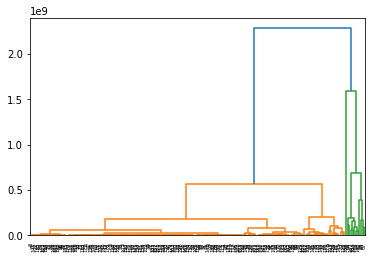

In [7]:
# Находим колличество кластеров confirmed
Z = sch.linkage(df_confirm_y, 'ward')
plt.figure()
dn = sch.dendrogram(Z)

# 3 кластера

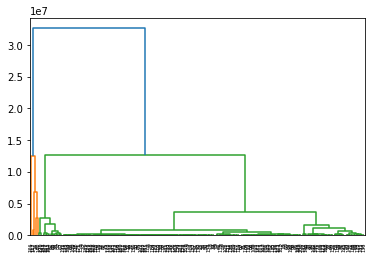

In [8]:
# Находим колличество кластеров death
Z = sch.linkage(df_deaths_y, 'ward')
plt.figure()
dn = sch.dendrogram(Z)

# 2 кластера

In [9]:
tsk_con = TimeSeriesKMeans(n_clusters=3)
tsk_deat = TimeSeriesKMeans(n_clusters=2)

In [10]:
# стандартизируем данные в таблице
ttsd_confirmed = to_time_series_dataset(df_confirm_y)
ttsd_deaths = to_time_series_dataset(df_deaths_y)

In [11]:
# разбиваем на кластеры
conf_tsk = tsk_con.fit(ttsd_confirmed)
death_tsk = tsk_deat.fit(ttsd_deaths)


Строим графики

In [12]:
# список стран
country  = tuple(df_confirmed_s.index)
# найдём индекс россии
rus_index = country.index('Russia')

In [13]:
# Лейблы по кластерам
conf_label = conf_tsk.labels_
death_label = death_tsk.labels_

In [14]:
# Список заголовков графиков
titl_list = ['Выявленно заболевших COVID-19 за год','Зафиксированно смертей от COVID-19']

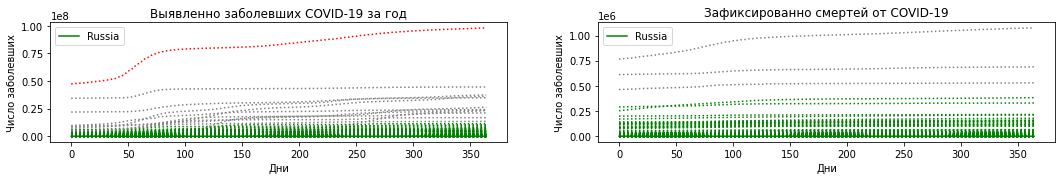

In [15]:
plt.figure(figsize=[18,18]) 

graph(ttsd_confirmed,conf_label,titl_list[0],1)
graph(ttsd_deaths,death_label,titl_list[1],2)
 

#Помесячная кластеризация

In [16]:
date = list(df_confirm_y.columns[-366:-1])
moon_confirmed = moon_data(df_confirm_y)
moon_deaths = moon_data(df_deaths_s)

дендрограммы

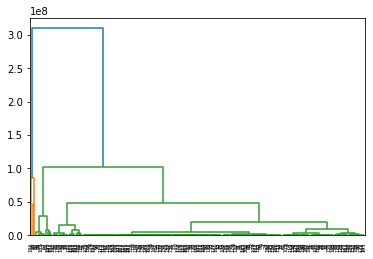

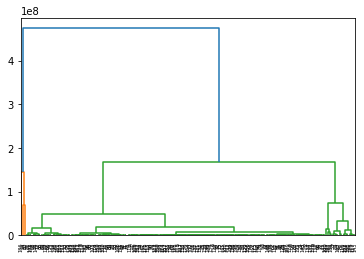

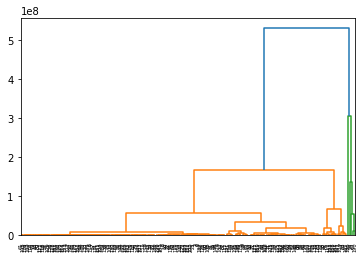

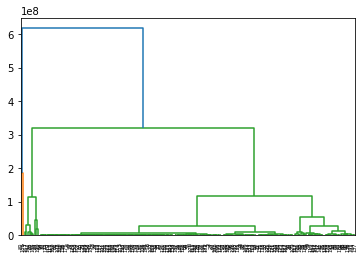

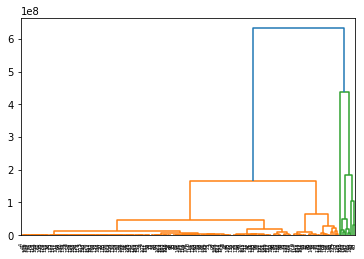

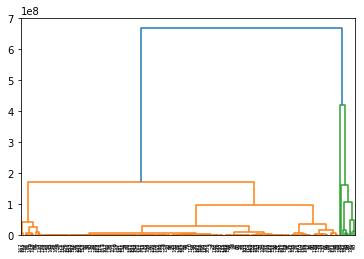

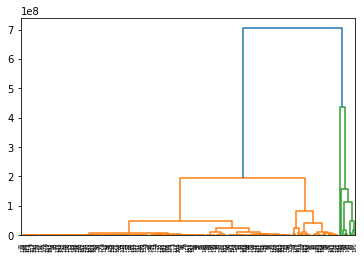

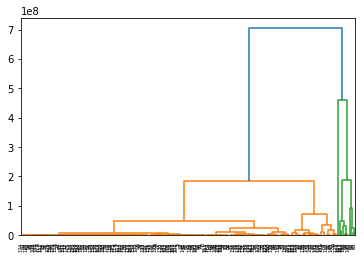

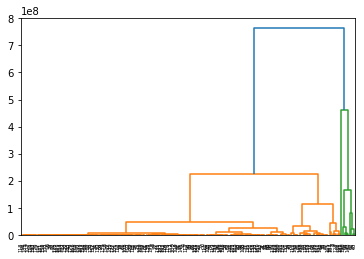

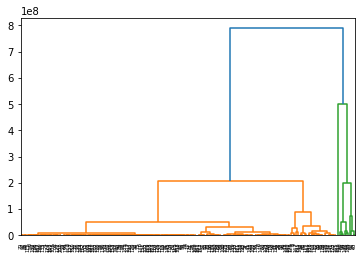

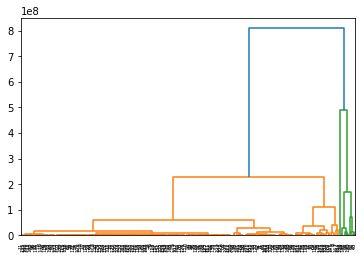

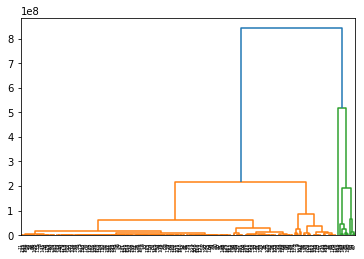

In [17]:
dendr_from_list(moon_confirmed)

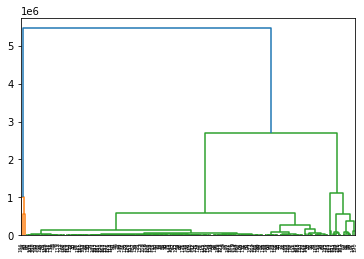

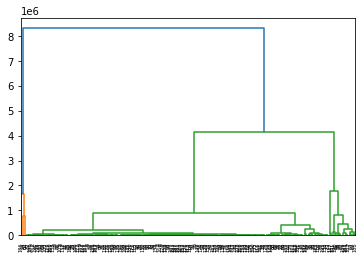

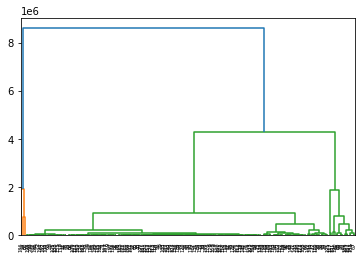

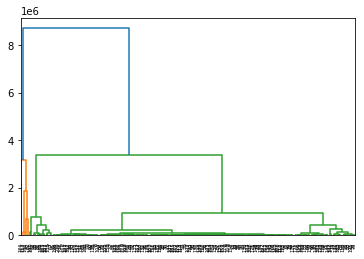

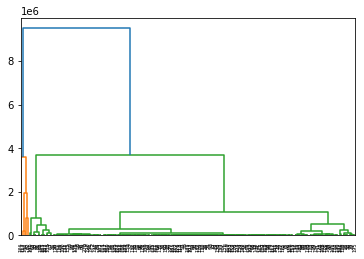

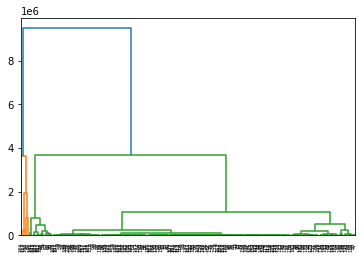

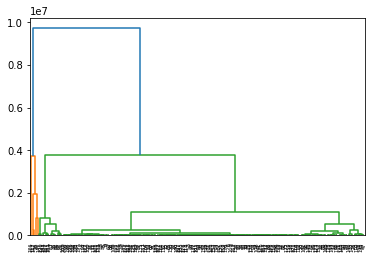

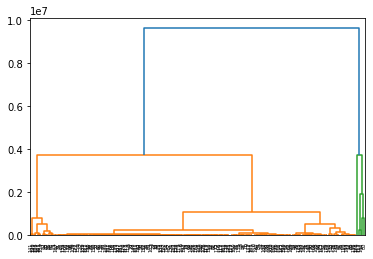

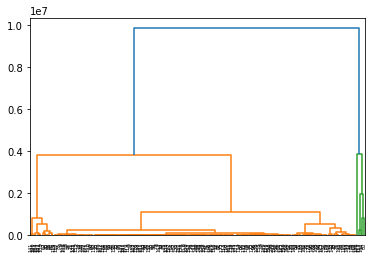

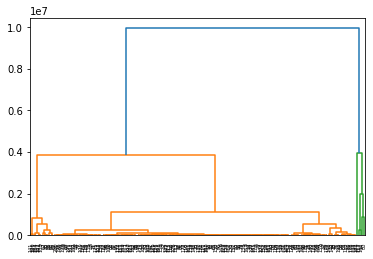

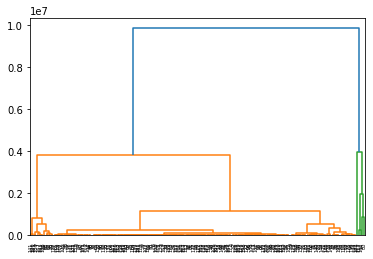

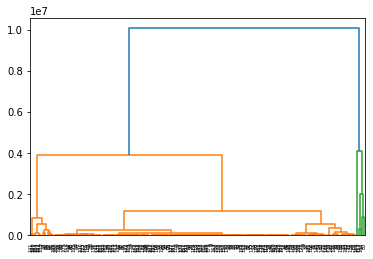

In [18]:
dendr_from_list(moon_deaths)

In [19]:
# записываем колличество кластеров из показания дендограмм
moon_confirmed_clast = [2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2]
moon_death_clast = [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [20]:
# кластеризируем
con_kmin_list, con_data_list = clastering_list(moon_confirmed, moon_confirmed_clast)
deat_kmin_list, deat_data_list = clastering_list(moon_deaths, moon_death_clast)

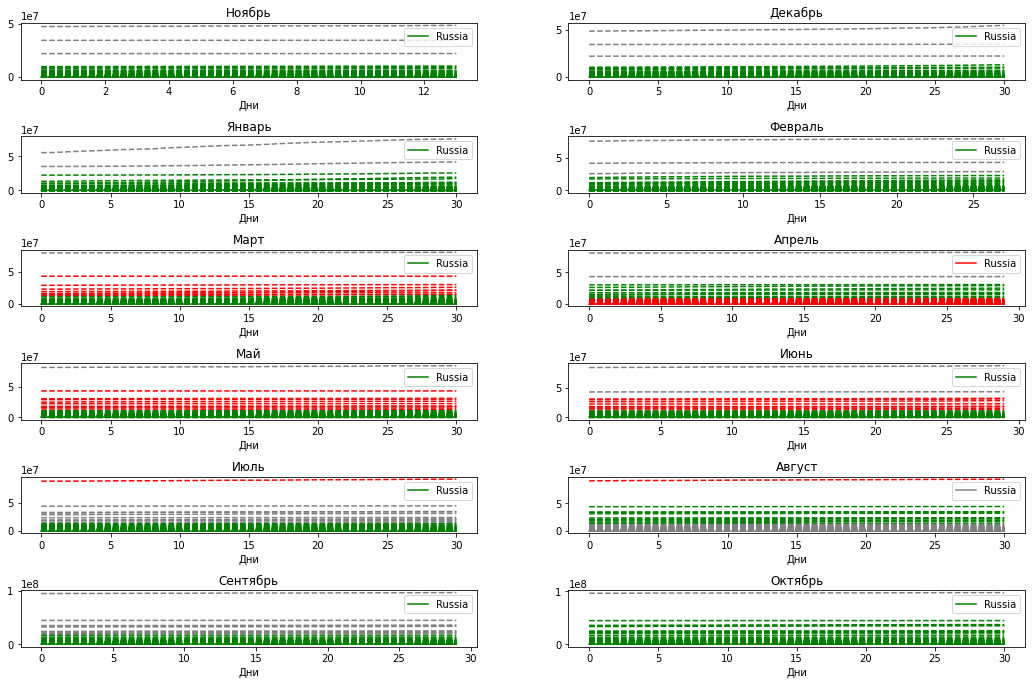

In [21]:
# строим график заблеваемости п месяцам
ploting_list(con_data_list, moon_confirmed)

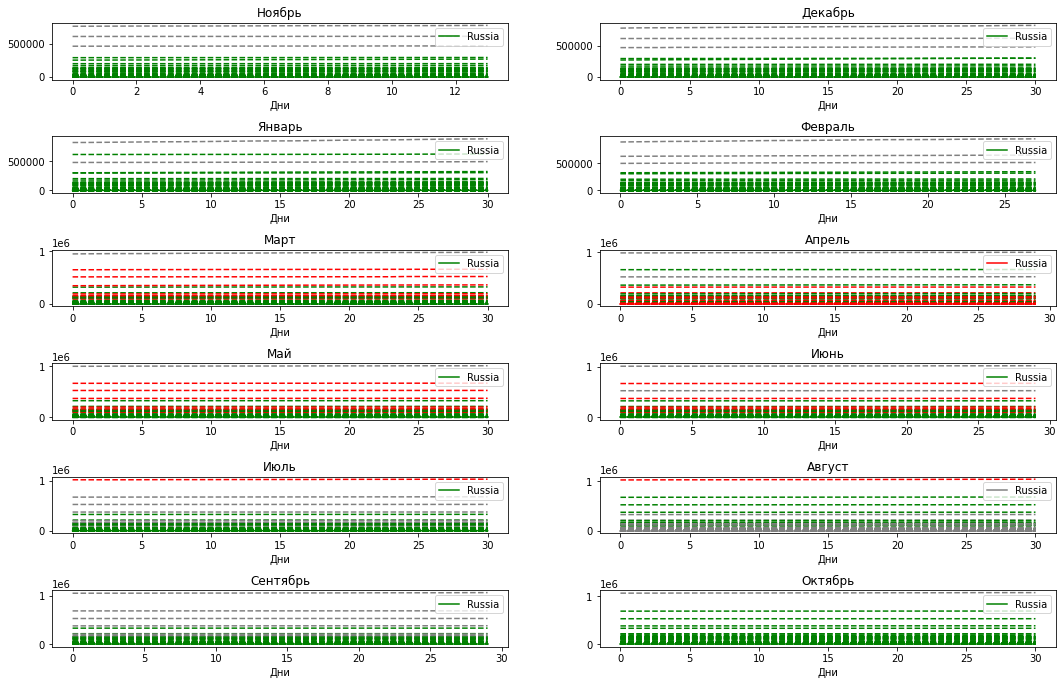

In [22]:
# Строим график смертности по месяцам
ploting_list(deat_data_list, moon_deaths)


#Вывод

Проведя анализ по кластеризации заболеваемости и смертности от COVID-19, можно заключить, что за последний год тенденций роста, в сравнении с графиком за весь период пандемии, не наблюдается. На это может привести к выводам о том, что возможно меры по вакцинации и введение ограничений сдерживают рост заболеваемости и смертности, либо то что эпидемия вошла в своё обычное течение.

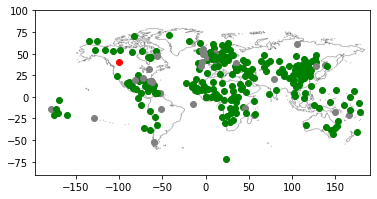

In [23]:
# Заболеваемость за весь период
country_label = {}
for i in range(len(conf_label)):
    country_label.update({country[i]:conf_label[i]})
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/Промежуточная атестация 1/baef53bf3f4fe1c6f660f02345ff12dc.jpg')
fig, ax = plt.subplots()
ax.imshow(img, extent=[-155, 190, -90, 100])
for i in range(len(df_confirmed['Country/Region'])):
    ax.scatter(df_confirmed['Long'][i], df_confirmed['Lat'][i], color=color[country_label[df_confirmed['Country/Region'][i]]])
plt.show()
#'Lat'

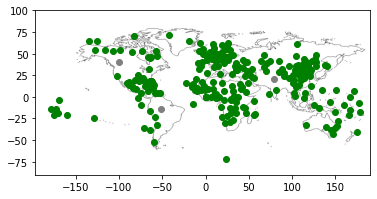

In [24]:
# Смертность за весь период
country_label = {}
for i in range(len(death_label)):
    country_label.update({country[i]:death_label[i]})
fig, ax = plt.subplots()
ax.imshow(img, extent=[-155, 190, -90, 100])
for i in range(len(df_deaths['Country/Region'])):
    ax.scatter(df_deaths['Long'][i], df_deaths['Lat'][i], color=color[country_label[df_deaths['Country/Region'][i]]])
plt.show()

Наложив графики на карту можно заметить что метки ростущей смертности и ростущей заболеваемости совпадают